In [31]:
# imports
import pickle
import pandas as pd
import numpy as np

# load pickle of lists
path = r"C:\Users\User\OneDrive\Desktop\Documents\06 Education\06 LHL\projects\drug-testing-project\data_files"
file = r"\df_lists-2023-01-05.pkl"
result_lists = pickle.load(open(path + file, 'rb'))

# concatenate all lists into one dataframe
df = result_lists[0]

for i in range(len(result_lists[1:])):
    df = pd.concat([df, result_lists[i]])
    
# change visit date to datetime
df['VISIT DATE'] = pd.to_datetime(df['VISIT DATE'])

# expand FTIR spectrometer results
results = df['FTIR SPECTROMETER'].str.split(', ', expand=True).add_prefix('FTIR SPECTROMETER ')
df = pd.concat([df, results], axis=1).drop(columns='FTIR SPECTROMETER')

# drop rows with all NaN values
df = df.dropna(how='all')
df = df.reset_index(drop=True)

# replace Fentanyl and Benzo strip results with -1 for Neg, 0 for NaN, 1 for Pos
df = df.replace({"FENTANYL  STRIP": {'Neg':-1,np.nan:0,'Pos':1}})
df = df.replace({"BENZO  STRIP": {'Neg':-1,np.nan:0,'Pos':1}})

# pickle the cleaned dataframe
file = open((path + r"\df-2023-01-05.pkl"),'wb')
pickle.dump(df, file)
file.close()

In [32]:
path = r"C:\Users\User\OneDrive\Desktop\Documents\06 Education\06 LHL\projects\drug-testing-project\data_files"
file = r"\df-2023-01-05.pkl"
df = pickle.load(open(path + file, 'rb'))

In [33]:
df.head()

,VISIT DATE,CITY,SITE,EXPECTED DRUG,CATEGORY,COLOUR,TEXTURE,FENTANYL STRIP,BENZO STRIP,FTIR SPECTROMETER 0,FTIR SPECTROMETER 1,FTIR SPECTROMETER 2,FTIR SPECTROMETER 3,FTIR SPECTROMETER 4,FTIR SPECTROMETER 5
0,2022-12-31,Vancouver,Get Your Drugs Tested,Ketamine,Psychedelic,White,Crystal,-1,0,Ketamine,Uncertain match,None,None,None,None
1,2022-12-31,Vancouver,Get Your Drugs Tested,Ketamine,Psychedelic,White,Crystal,-1,0,Ketamine,Uncertain match,None,None,None,None
2,2022-12-31,Vancouver,Get Your Drugs Tested,Cocaine,Stimulant,White,Granules,-1,0,Cocaine hcl,None,None,None,None,None
3,2022-12-31,Vancouver,Get Your Drugs Tested,MDMA,Psychedelic,Brown (light),Powder,-1,0,Mdma,None,None,None,None,None
4,2022-12-31,Vancouver,Get Your Drugs Tested,MDMA,Psychedelic,Pink (light),Crystal,-1,0,Mdma,None,None,None,None,None


In [11]:
df.shape

(60040, 15)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60040 entries, 1 to 63041
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   VISIT DATE           60040 non-null  datetime64[ns]
 1   CITY                 60040 non-null  object        
 2   SITE                 60040 non-null  object        
 3   EXPECTED  DRUG       60040 non-null  object        
 4   CATEGORY             60040 non-null  object        
 5   COLOUR               60040 non-null  object        
 6   TEXTURE              60040 non-null  object        
 7   FENTANYL  STRIP      58093 non-null  object        
 8   BENZO  STRIP         26345 non-null  object        
 9   FTIR SPECTROMETER 0  59444 non-null  object        
 10  FTIR SPECTROMETER 1  36033 non-null  object        
 11  FTIR SPECTROMETER 2  21180 non-null  object        
 12  FTIR SPECTROMETER 3  6345 non-null   object        
 13  FTIR SPECTROMETER 4  1039 non-n

In [13]:
df.describe()

C:\Users\User\AppData\Local\Temp\ipykernel_15620\3627053830.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe()


,VISIT DATE,CITY,SITE,EXPECTED DRUG,CATEGORY,COLOUR,TEXTURE,FENTANYL STRIP,BENZO STRIP,FTIR SPECTROMETER 0,FTIR SPECTROMETER 1,FTIR SPECTROMETER 2,FTIR SPECTROMETER 3,FTIR SPECTROMETER 4,FTIR SPECTROMETER 5
count,60040,60040,60040,60040,60040,60040,60040,58093,26345,59444,36033,21180,6345,1039,208
unique,1454,36,113,383,7,32,15,3,3,395,309,191,121,60,34
top,2021-07-31 00:00:00,Vancouver,Get Your Drugs Tested,Fentanyl,Opioid,White,Powder,Neg,Neg,Caffeine,Caffeine,Caffeine,Caffeine,Caffeine,Caffeine
freq,169,49331,36877,10952,24178,21402,15046,35559,18398,8251,6783,4779,1393,215,58
first,2018-06-07 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2022-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.tail()

,VISIT DATE,CITY,SITE,EXPECTED DRUG,CATEGORY,COLOUR,TEXTURE,FENTANYL STRIP,BENZO STRIP,FTIR SPECTROMETER 0,FTIR SPECTROMETER 1,FTIR SPECTROMETER 2,FTIR SPECTROMETER 3,FTIR SPECTROMETER 4,FTIR SPECTROMETER 5
63037,2018-06-07,Surrey,SafePoint,Heroin,Opioid,Grey,Pebble,Pos,NaN,Caffeine,Fentanyl,None,None,None,None
63038,2018-06-07,Surrey,SafePoint,Fentanyl,Opioid,Brown (light),Pebble,Pos,NaN,Mannitol,Heroin hcl,Caffeine,Fentanyl,None,None
63039,2018-06-07,Surrey,SafePoint,Unknown,Unknown,Pink,Residue,Pos,NaN,Caffeine,None,None,None,None,None
63040,2018-06-07,Surrey,SafePoint,Unknown,Unknown,Grey,Pebble,Neg,NaN,Uncertain match,None,None,None,None,None
63041,2018-06-07,Surrey,SafePoint,Fentanyl,Opioid,Blue (light),Pebble,Pos,NaN,Caffeine,Fentanyl,None,None,None,None


In [56]:
df_visits = df.groupby(df['VISIT DATE'])['VISIT DATE'].count()

In [57]:
df_visits

VISIT DATE
2019-12-02     5
2019-12-03     7
2019-12-04     5
2019-12-05    21
2019-12-09    10
              ..
2022-11-26    51
2022-11-27    44
2022-11-28    80
2022-11-29    71
2022-11-30    75
Name: VISIT DATE, Length: 1062, dtype: int64

In [58]:
from matplotlib import pyplot as plt

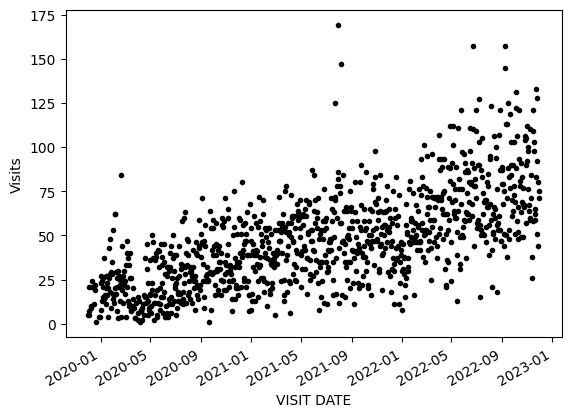

In [71]:
df_visits.plot(style='k.')
plt.ylabel('Visits')
plt.show()

In [27]:
df_city = df.groupby('CITY')['VISIT DATE'].count()

In [28]:
df_city

CITY
Abbotsford                256
Agassiz                   157
Boston Bar                 51
Burnaby                    15
Castlegar                  17
Chase                      85
Chilliwack                239
Coquitlam                   9
Cranbrook                 621
Fairmont Hot Springs      209
Grand Forks               186
Hope                       26
Kamloops                 1158
Kelowna                   735
Kimberley                   7
Langley                     2
Maple Ridge                26
Merritt                   348
Mission                    78
Nanaimo                   703
Nelson                   1650
New Westminster           488
Penticton                 704
Powell River                1
Prince George             312
Princeton                   6
Salmo                     318
Sun Peaks                  39
Surrey                   1417
Terrace                    70
Trail                     152
Vancouver               49331
Vernon                    569
Victo

<AxesSubplot: xlabel='CITY'>

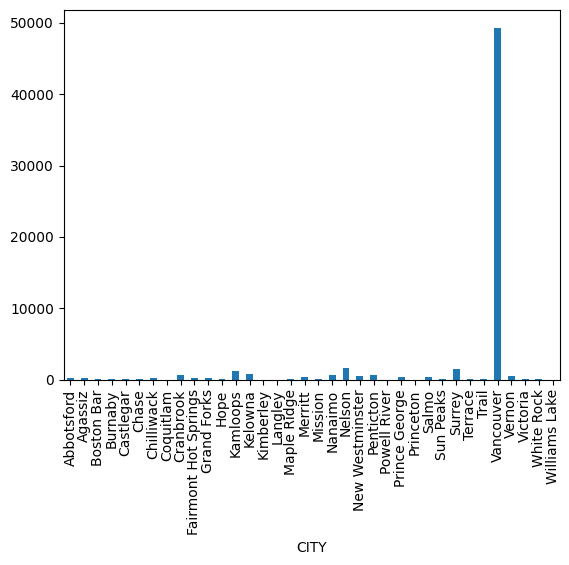

In [30]:
df_city.plot(kind='bar')